## 28 OpenCVによる画像の読み込みと色空間の変換，表示

[データサイエンスのためのPython入門28〜OpenCVによる画像の読み込みと色空間の変換，表示〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/opencv/)

**補足**: `opencv-python`パッケージではなく、GUIを含まない`opencv-python-headless`パッケージであれば、`libsm6`などのライブラリを追加せずに使える。

In [1]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

### cv2.imread()関数

In [2]:
lenna = cv2.imread("lenna.png")

In [3]:
type(lenna)

numpy.ndarray

In [4]:
lenna.shape

(220, 220, 3)

### matplotlib.axes.Axes.imshow()メソッド

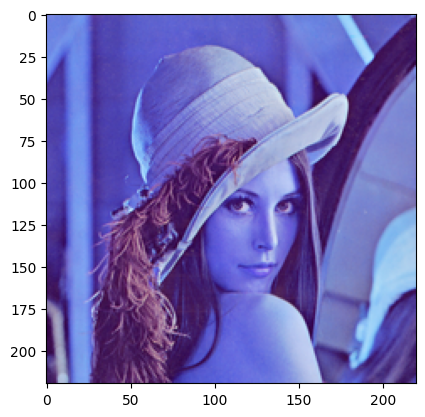

In [5]:
fig, axes = plt.subplots()
axes.imshow(lenna)
fig.show()

色が変！`cv2.imread()`はRGBではなく、**BGR**で読み込むのに注意！！

### cv2.cvtColor()関数

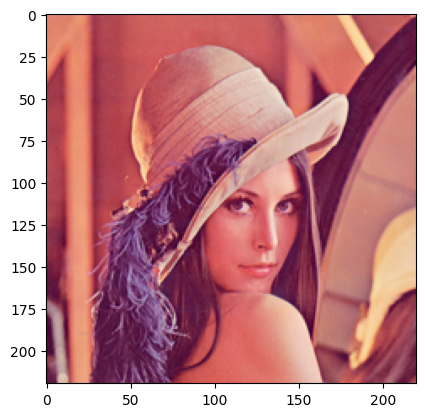

In [6]:
lenna_rgb = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots()
axes.imshow(lenna_rgb)
fig.show()

## 29 globの使い方・応用まで完全解説

[データサイエンスのためのPython入門29〜globの使い方・応用まで完全解説〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/glob/)

ここでは手持ちのファイルで簡易的に演習する。

In [7]:
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [8]:
path_list = glob("*")
type(path_list)

list

In [9]:
path_list

['tmp.csv',
 'python-31-new-file.txt',
 'python-22-saving_sample.pdf',
 'lenna.png',
 'python-27-seaborn_sample.png',
 'train_w_adult.csv',
 'python-06--09-numpy.ipynb',
 'python-20--23-matplotlib.ipynb',
 'python-03--05-basic.ipynb',
 'python-28--33.ipynb',
 'my_tasks.py',
 'saved_ndarray.npy',
 'train.csv',
 'python-22-saving_sample.png',
 'python-22-saving_multifig-sample.pdf',
 'Untitled.ipynb',
 'python-10--19-pandas.ipynb',
 'python-24--27-seaborn.ipynb',
 '__pycache__']

In [10]:
name_list = [p.split(".")[0] for p in path_list]
name_list

['tmp',
 'python-31-new-file',
 'python-22-saving_sample',
 'lenna',
 'python-27-seaborn_sample',
 'train_w_adult',
 'python-06--09-numpy',
 'python-20--23-matplotlib',
 'python-03--05-basic',
 'python-28--33',
 'my_tasks',
 'saved_ndarray',
 'train',
 'python-22-saving_sample',
 'python-22-saving_multifig-sample',
 'Untitled',
 'python-10--19-pandas',
 'python-24--27-seaborn',
 '__pycache__']

In [11]:
extension_list = [p.split(".")[-1] for p in path_list]
np.unique(extension_list)

array(['__pycache__', 'csv', 'ipynb', 'npy', 'pdf', 'png', 'py', 'txt'],
      dtype='<U11')

In [12]:
df = pd.DataFrame({"name": name_list, "extension": extension_list})
df.head()

,name,extension
0,tmp,csv
1,python-31-new-file,txt
2,python-22-saving_sample,pdf
3,lenna,png
4,python-27-seaborn_sample,png


In [13]:
df["extension"].value_counts()

extension
ipynb          7
csv            3
png            3
pdf            2
txt            1
py             1
npy            1
__pycache__    1
Name: count, dtype: int64

<Axes: xlabel='extension', ylabel='count'>

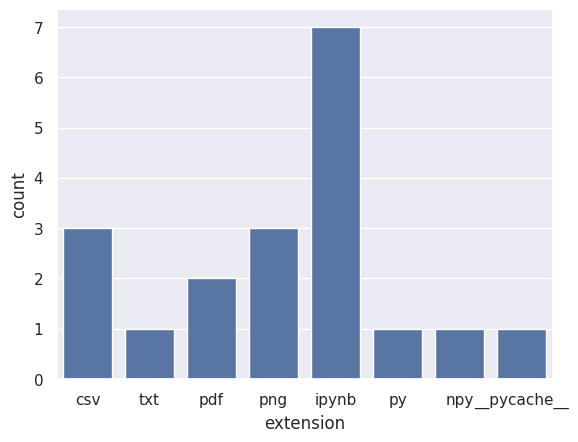

In [14]:
sns.set_theme()
sns.countplot(data=df, x="extension")

## 30 tqdmを使ってforループでプログレスバーを表示する

[データサイエンスのためのPython入門30〜tqdmを使ってforループでプログレスバーを表示する〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/tqdm/)


In [15]:
from tqdm import tqdm

In [16]:
sum = 0
for i in tqdm(range(0, 10_000_000)):
    sum += i

100%|██████████| 10000000/10000000 [00:00<00:00, 10966790.86it/s]


データフレームのイテレータの場合

In [17]:
for _, _ in tqdm(df.iterrows()):
    pass

19it [00:00, 31979.04it/s]


ループ回数が表示されないので、`total`引数で指定する。

In [18]:
for _, _ in tqdm(df.iterrows(), total=len(df)):
    pass

100%|██████████| 19/19 [00:00<00:00, 41333.91it/s]


## 31 osモジュールとpathlibモジュールを使って安全にPath操作をする

[データサイエンスのためのPython入門31〜osモジュールとpathlibモジュールを使って安全にPath操作をする〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/os_module/)

In [19]:
import os
from pathlib import Path

In [20]:
p = Path(".")
type(p)

pathlib.PosixPath

### Path.iterdir()メソッド

In [21]:
type(p.iterdir())

generator

In [22]:
list(p.iterdir())

[PosixPath('tmp.csv'),
 PosixPath('.ipynb_checkpoints'),
 PosixPath('python-31-new-file.txt'),
 PosixPath('python-22-saving_sample.pdf'),
 PosixPath('lenna.png'),
 PosixPath('python-27-seaborn_sample.png'),
 PosixPath('train_w_adult.csv'),
 PosixPath('python-06--09-numpy.ipynb'),
 PosixPath('python-20--23-matplotlib.ipynb'),
 PosixPath('python-03--05-basic.ipynb'),
 PosixPath('python-28--33.ipynb'),
 PosixPath('my_tasks.py'),
 PosixPath('saved_ndarray.npy'),
 PosixPath('train.csv'),
 PosixPath('python-22-saving_sample.png'),
 PosixPath('python-22-saving_multifig-sample.pdf'),
 PosixPath('Untitled.ipynb'),
 PosixPath('python-10--19-pandas.ipynb'),
 PosixPath('.gitignore'),
 PosixPath('python-24--27-seaborn.ipynb'),
 PosixPath('__pycache__')]

### Path.glob()メソッド

In [23]:
type(p.glob("**/*.png"))

map

In [24]:
list(p.glob("**/*.png"))

[PosixPath('lenna.png'),
 PosixPath('python-27-seaborn_sample.png'),
 PosixPath('python-22-saving_sample.png'),
 PosixPath('.ipynb_checkpoints/python-27-seaborn_sample-checkpoint.png'),
 PosixPath('.ipynb_checkpoints/python-22-saving_sample-checkpoint.png'),
 PosixPath('.ipynb_checkpoints/lenna-checkpoint.png')]

### Path.as_posix()メソッド

In [25]:
p_abs = p.absolute()
p_abs

PosixPath('/app/notebooks')

In [26]:
p_abs.as_posix()

'/app/notebooks'

### os.path.split()関数

In [27]:
os.path.split(p_abs)

('/app', 'notebooks')

`pathlib`モジュールでも同じ事ができる。

In [28]:
p_abs.parent

PosixPath('/app')

In [29]:
p_abs.name

'notebooks'

In [30]:
p_abs.parts

('/', 'app', 'notebooks')

### os.path.join()関数

In [31]:
os.path.join(p_abs, "test.txt")

'/app/notebooks/test.txt'

`pathlib`モジュールでも同様

In [32]:
p_abs.joinpath("test.txt")

PosixPath('/app/notebooks/test.txt')

In [33]:
p_abs / "test.txt"

PosixPath('/app/notebooks/test.txt')

### os.path.exists()関数とos.mkdir()関数

In [34]:
new_file = p / "python-31-new-file.txt"
new_file.exists()

True

In [35]:
if new_file.exists():
    print("{} exists".format(new_file.name))
else:
    new_file.touch()

python-31-new-file.txt exists


In [36]:
new_file.exists()

True

## 32 これだけ知っておけばいいmultiprocessingでの並列処理

[データサイエンスのためのPython入門32〜これだけ知っておけばいいmultiprocessingでの並列処理〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/multiprocessing/)

**補足**: このままでは`AttributeError: module '__main__' has no attribute 'double'`というエラーで動かなかった。

エラーの原因は、Python 3.14以降、子プロセスは`fork`（高速・非安全）でなく **`forkserver`（`fork`と`spawn`の間の子）** で開始するようになった事による。JupyterLabのセルに書かれた関数は、メインのプロセス（メモリ上）には存在するが、物理的な .py ファイルには書き込まれていない。新しいプロセスが「double 関数を読み込もう！」とメインプログラム（__main__）を見に行っても、ファイルの実体がない。

- 解決策1：関数を外部ファイル（`my_tasks.py`など）に切り出す（オススメ！）
    - https://stackoverflow.com/questions/47313732/jupyter-notebook-never-finishes-processing-using-multiprocessing-python-3/47374811
    - 併せて、`%autoreload`を使うと良い → [データサイエンスのためのPython入門33(最終回)〜Pythonスクリプトを作ってJupyterから呼び出す〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/python_script/) を参照
- 解決策2：[multiprocess](https://github.com/uqfoundation/multiprocess) ライブラリ（サードパーティ製）を使う

→ 解決策1で行く！

In [37]:
%load_ext autoreload

%autoreload 2

from multiprocessing import Pool, cpu_count

import my_tasks
from tqdm import tqdm

cpu_count()

10

### map()関数

In [38]:
def double(n):
    return 2 * n


params = range(1, 5)

list(map(double, params))

[2, 4, 6, 8]

**補足**: PNGファイルを大量に用意するのが大変だったので、代わりに大きな乱数配列を生成してソートする **CPUバウンド** な重い処理（`my_tasks.sort()`関数）を例とした。

In [39]:
params = range(100)

In [40]:
%time _ = list(map(my_tasks.sort, params))

CPU times: user 1min 40s, sys: 90.6 ms, total: 1min 40s
Wall time: 1min 40s


### Pool.map()メソッド

**補足**: 定番の`with`だと、実行後にゾンビプロセスが残ってします。明示的に`close()`, `join()`するのが吉。

In [41]:
cpu_num = cpu_count() - 1

In [42]:
if __name__ == "__main__":
    p = Pool(processes=cpu_num)

    try:
        %time _ = list(p.map(my_tasks.sort, params))
    finally:
        p.close()
        p.join()

CPU times: user 3.82 ms, sys: 3 ms, total: 6.82 ms
Wall time: 16.3 s


### Pool.imap()メソッド

In [43]:
if __name__ == "__main__":
    p = Pool(processes=cpu_num)

    try:
        %time _ = list(tqdm(p.imap(my_tasks.sort, params), total=len(params)))
    finally:
        p.close()
        p.join()

100%|██████████| 100/100 [00:16<00:00,  6.16it/s]

CPU times: user 30.3 ms, sys: 5.98 ms, total: 36.3 ms
Wall time: 16.2 s


**補足**: イテレーターが返す結果の順番が重要でない場合は`Pool.imap_unordered()`メソッドも使える。

In [44]:
if __name__ == "__main__":
    p = Pool(processes=cpu_num)

    try:
        %time _ = list(tqdm(p.imap_unordered(my_tasks.sort, params), total=len(params)))
    finally:
        p.close()
        p.join()

100%|██████████| 100/100 [00:17<00:00,  5.81it/s]

CPU times: user 45.2 ms, sys: 12 ms, total: 57.2 ms
Wall time: 17.2 s


### 複数の引数を関数に渡す場合

複数の引数をまとめたタプル`(seed, length, n_iter)`のリスト

In [45]:
length = 100
params = [(seed, 1_000_000, 100) for seed in range(length)]
params[:8]

[(0, 1000000, 100),
 (1, 1000000, 100),
 (2, 1000000, 100),
 (3, 1000000, 100),
 (4, 1000000, 100),
 (5, 1000000, 100),
 (6, 1000000, 100),
 (7, 1000000, 100)]

**補足（ラップ関数の`*args`）**：[データサイエンスのためのPython入門⑤〜文法まとめ2 関数〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/python_grammar2/) の`*args`は関数定義での説明だったが、関数呼び出しの方でも同様に書ける。[Pythonで関数の引数にリスト、タプル、辞書を展開して渡す | note.nkmk.me](https://note.nkmk.me/python-argument-expand/) でも解説されている。

In [46]:
if __name__ == "__main__":
    p = Pool(processes=cpu_num)

    try:
        %time _ = list(tqdm(p.imap_unordered(my_tasks.wrap_sort, params), total=len(params)))
    finally:
        p.close()
        p.join()

100%|██████████| 100/100 [00:17<00:00,  5.83it/s]

CPU times: user 45.3 ms, sys: 10.9 ms, total: 56.1 ms
Wall time: 17.2 s


## 33(最終回) Pythonスクリプトを作ってJupyterから呼び出す

[データサイエンスのためのPython入門33(最終回)〜Pythonスクリプトを作ってJupyterから呼び出す〜 - 米国データサイエンティストのブログ](https://datawokagaku.com/python_script/)

In [57]:
%autoreload 2

import cv2
import matplotlib.pyplot as plt
import util

util

<module 'util' from '/app/notebooks/util.py'>

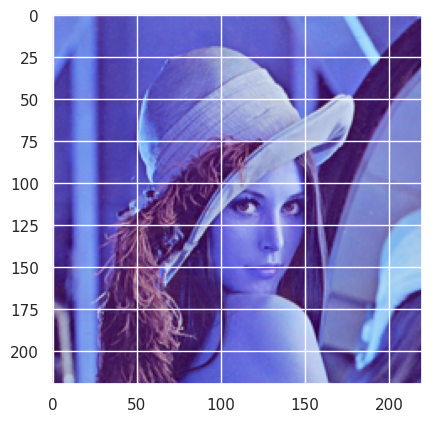

In [58]:
%matplotlib inline

im = cv2.imread("lenna.png")

fig, axes = plt.subplots()
axes.imshow(im)
fig.show()

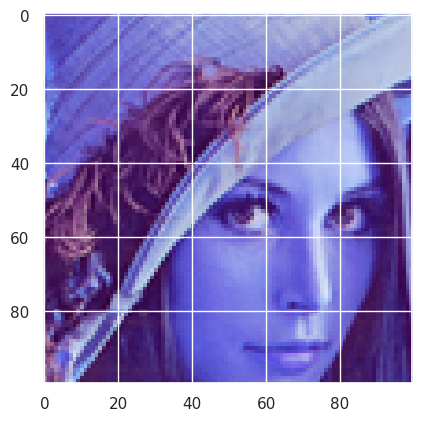

In [59]:
crop_im = util.crop_img(im)

fig, axes = plt.subplots()
axes.imshow(crop_im)
fig.show()